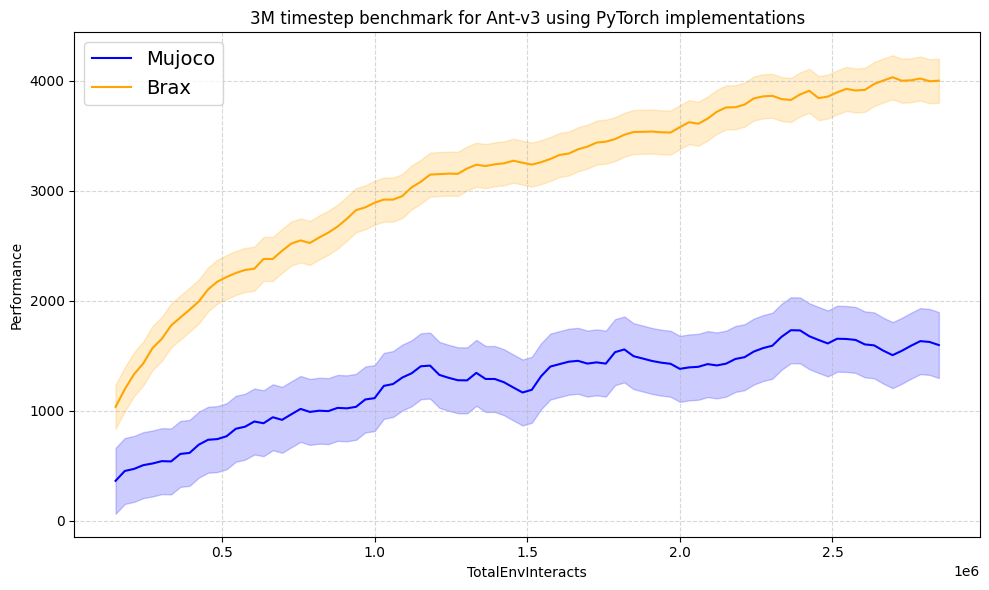

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: Sliding window function ---


def sliding_window_avg(data, window=11):
    return np.convolve(data, np.ones(window) / window, mode='valid')


# --- Simulated Data Generation ---
timesteps = np.linspace(0, 3e6, 100)
window_size = 11


def generate_curve(base, noise=500, growth=2.0):
    raw = growth * np.log1p(timesteps / 1e5) * 1000 + base
    raw += np.random.randn(len(timesteps)) * noise
    mean = sliding_window_avg(raw, window_size)
    std = sliding_window_avg(np.ones_like(raw) * noise, window_size)
    return mean, std


# --- Algorithms & Colors ---
algorithms = {
    "Mujoco": generate_curve(0, 300, 0.5),
    "Brax": generate_curve(0, 200, 1.2),

}

colors = {
    "Mujoco": "blue",
    "Brax": "orange",

}

# --- Adjusted X-axis to match shorter smoothed arrays ---
timesteps_smooth = timesteps[(window_size - 1)//2: -(window_size // 2)]

# --- Plotting ---
plt.figure(figsize=(10, 6))
for name, (mean, std) in algorithms.items():
    plt.plot(timesteps_smooth, mean, label=name, color=colors[name])
    plt.fill_between(timesteps_smooth, mean - std, mean +
                     std, alpha=0.2, color=colors[name])

plt.xlabel("TotalEnvInteracts")
plt.ylabel("Performance")
plt.title("3M timestep benchmark for Ant-v3 using PyTorch implementations")
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [2]:
from src.metrics.metric_visualiser import MetricsVisualizer
viz = MetricsVisualizer()

# Load data based on composition
viz.get(composition={'mujoco': 0.5, 'brax': 0.5})

# Plot reward metrics
viz.plot_reward()

TypeError: MetricsVisualizer.get() missing 1 required positional argument: 'experiment'

In [4]:
import os


def count_string_occurrences_in_filenames(directory, search_strings):
    """
    Reads all files in the specified directory and counts the occurrence of certain strings in their names.

    Args:
        directory (str): Path to the directory containing the files.

    Returns:
        dict: A dictionary with search strings as keys and their counts as values.
    """

    counts = {search_string: 0 for search_string in search_strings}

    for filename in os.listdir(directory):
        for search_string in search_strings:
            if search_string in filename:
                counts[search_string] += 1

    return counts


search_strings = ['sac_ant_m0b100_rewards',
                  'sac_ant_m25b75_rewards', 'sac_ant_m50b50_rewards', 'sac_ant_m75b25_rewards', 'sac_ant_m100b0_rewards']

count_string_occurrences_in_filenames('data', search_strings=search_strings)


search_strings = ['sac_halfcheetah_m0b100_rewards',
                  'sac_halfcheetah_m25b75_rewards', 'sac_halfcheetah_m50b50_rewards', 'sac_halfcheetah_m75b25_rewards', 'sac_halfcheetah_m100b0_rewards']

count_string_occurrences_in_filenames('data', search_strings=search_strings)

search_strings_list = [['sac_halfcheetah_m0b100_rewards', 'sac_halfcheetah_m25b75_rewards', 'sac_halfcheetah_m50b50_rewards', 'sac_halfcheetah_m75b25_rewards', 'sac_halfcheetah_m100b0_rewards'],
                       ['td3_halfcheetah_m0b100_rewards', 'td3_halfcheetah_m25b75_rewards', 'td3_halfcheetah_m50b50_rewards',
                           'td3_halfcheetah_m75b25_rewards', 'td3_halfcheetah_m100b0_rewards'],

                       ['sac_ant_m0b100_rewards', 'sac_ant_m25b75_rewards', 'sac_ant_m50b50_rewards',
                           'sac_ant_m75b25_rewards', 'sac_ant_m100b0_rewards'],
                       ['td3_ant_m0b100_rewards', 'td3_ant_m25b75_rewards', 'td3_ant_m50b50_rewards',
                        'td3_ant_m75b25_rewards', 'td3_ant_m100b0_rewards'],

                       ['sac_walker2d_m0b100_rewards', 'sac_walker2d_m25b75_rewards', 'sac_walker2d_m50b50_rewards',
                        'sac_walker2d_m75b25_rewards', 'sac_walker2d_m100b0_rewards'],
                       ['td3_walker2d_m0b100_rewards', 'td3_walker2d_m25b75_rewards', 'td3_walker2d_m50b50_rewards',
                        'td3_walker2d_m75b25_rewards', 'td3_walker2d_m100b0_rewards'],
                       ]
n = 0
for search_strings in search_strings_list:
    res = count_string_occurrences_in_filenames(
        'data', search_strings=search_strings)
    n += sum(res.values())
    print(res)
print('5/5/4 - 100 -> ', n)
print('3 per setup: ', n, '/90')
print('5 per setup: ', n, '/150')

{'sac_halfcheetah_m0b100_rewards': 4, 'sac_halfcheetah_m25b75_rewards': 4, 'sac_halfcheetah_m50b50_rewards': 6, 'sac_halfcheetah_m75b25_rewards': 3, 'sac_halfcheetah_m100b0_rewards': 2}
{'td3_halfcheetah_m0b100_rewards': 3, 'td3_halfcheetah_m25b75_rewards': 2, 'td3_halfcheetah_m50b50_rewards': 3, 'td3_halfcheetah_m75b25_rewards': 2, 'td3_halfcheetah_m100b0_rewards': 4}
{'sac_ant_m0b100_rewards': 1, 'sac_ant_m25b75_rewards': 1, 'sac_ant_m50b50_rewards': 4, 'sac_ant_m75b25_rewards': 3, 'sac_ant_m100b0_rewards': 6}
{'td3_ant_m0b100_rewards': 0, 'td3_ant_m25b75_rewards': 0, 'td3_ant_m50b50_rewards': 0, 'td3_ant_m75b25_rewards': 0, 'td3_ant_m100b0_rewards': 0}
{'sac_walker2d_m0b100_rewards': 0, 'sac_walker2d_m25b75_rewards': 0, 'sac_walker2d_m50b50_rewards': 0, 'sac_walker2d_m75b25_rewards': 0, 'sac_walker2d_m100b0_rewards': 0}
{'td3_walker2d_m0b100_rewards': 0, 'td3_walker2d_m25b75_rewards': 0, 'td3_walker2d_m50b50_rewards': 0, 'td3_walker2d_m75b25_rewards': 0, 'td3_walker2d_m100b0_rewards